In [41]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from scipy import stats
import os.path
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
if os.path.isfile('higgs.h5'): 
    higgs_store = pd.HDFStore('higgs.h5')
    data = higgs_store['data']
    higgs_store.close()
else:
    data = pd.read_csv('HIGGS.csv', header=None)

#### Data Exploration

In [32]:
# render the first 5 rows to visually inspect the data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [7]:
# get summary statistics for the dataset
data.iloc[:, 1:].describe()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,9.927294e-01,...,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,4.999939e-01,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.564608e-01,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,8.901377e-01,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,1.201875e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


#### Exploratory Visualization

In [47]:
#plt.matshow(data.iloc[:, 1:22].corr(), cmap=plt.cm.gray)

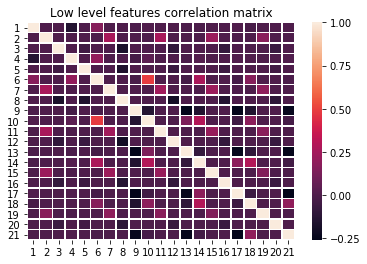

In [51]:
# plot the correlation matrix as a heat map
# helps identify columns containing similar data
ax = plt.axes()
sns.heatmap(data.iloc[:, 1:22].corr(), 
        xticklabels=data.iloc[:, 1:22].columns,
        yticklabels=data.iloc[:, 1:22].columns,
        linewidths=.5,
        ax=ax)
ax.set_title('Low level features correlation matrix')
plt.show()

In [9]:
#is any value null
data.isnull().values.any()

False

In [35]:
# are the classes imbalanced
data.iloc[:,0].value_counts()

1.0    5829123
0.0    5170877
Name: 0, dtype: int64

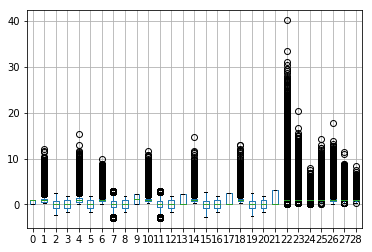

In [10]:
# does the data contain outliers
# black dots are outliers
data.boxplot()

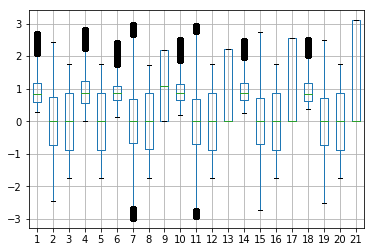

In [11]:
# data after outlier removal
data.iloc[:, 1:22][(np.abs(stats.zscore(data)) < 3).all(axis=1)].boxplot()

#### Default performance

##### All features

In [24]:
# run the xgboost classifier with default params on all columns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#remove outliers before classification
selector = (np.abs(stats.zscore(data.iloc[:, 1:22])) < 3).all(axis=1)
X = data.iloc[:, 1:][selector]
y = data.iloc[:, 0][selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y, train_size=0.1)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("AUC on all features, default xgboost: ", roc_auc_score(y_test, y_pred))

/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC on all features, default xgboost:  0.7052909173964135


##### Low level features

In [25]:
# run the xgboost classifier with default params on low level features
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#remove outliers before classification
selector = (np.abs(stats.zscore(data.iloc[:, 1:22])) < 3).all(axis=1)
X = data.iloc[:, 1:22][selector]
y = data.iloc[:, 0][selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y, train_size=0.1)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("AUC on low level features, default xgboost: ", roc_auc_score(y_test, y_pred))

/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC on low level features, default xgboost:  0.6069491767076749


##### High level features

In [26]:
# run the xgboost classifier with default params on high level features
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#remove outliers before classification
selector = (np.abs(stats.zscore(data.iloc[:, 1:22])) < 3).all(axis=1)
X = data.iloc[:, 22:][selector]
y = data.iloc[:, 0][selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y, train_size=0.1)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("AUC on high level features, default xgboost: ", roc_auc_score(y_test, y_pred))

/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC on high level features, default xgboost:  0.6904762580156374


#### Model Improvement

In [4]:
# use gridsearchcv for hyper param tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

#params and their value ranges
#grid search cv search through all combinations of these and reports the model with the best score
param_grid = {
    # high learning rate might converge faster, but might miss a optima
    'learning_rate' : [0.05, 0.1, 0.2, 0.3 ],
    
    #higher the depth, higher the complexity of the model
    'max_depth': [3, 5, 6, 10, 20],
    
    #subsample ratio of the training instance. 
    #Setting it to 0.5 means that XGBoost randomly collected half of the data instances 
    #to grow trees and this will prevent overfitting.
    'subsample': [0.5, 1],
    
    #subsample ratio of columns when constructing each tree.
    'colsample_bytree': [0.5, 1],
    
    #L2 regularization
    'reg_lambda': [0,1],
    
    #number of trees in the ensemble
    'n_estimators': [100, 500, 1000]
}

selector = (np.abs(stats.zscore(data.iloc[:, 1:22])) < 3).all(axis=1)
X = data.iloc[:, 1:22][selector]
y = data.iloc[:, 0][selector]

#since this takes a long time to run
#do not run on all data
#run on a sample
#make a stratified sample to ensure even distribution of classes in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y, train_size=0.1)

model = XGBClassifier(eval_metric='auc', silent=False, tree_method='gpu_exact', gpu_id=0, n_gpus=-1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=   5.5s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=   4.8s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=   5.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=   5.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=   5.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=3, colsample_

[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=   6.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=   6.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=   6.4s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=   6.3s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=5, colsample_

[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=   7.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=   7.3s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=   7.2s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=   7.3s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=6, colsample_

[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  11.8s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  11.7s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  11.8s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  11.9s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=10, c

[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=0.5, total=  28.0s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  27.0s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  27.0s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  27.1s
[CV] subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.05, n_estimators=100, reg_lambda=1, max_depth

[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=   5.3s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5, total=   5.3s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5, total=   5.3s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5, total=   5.4s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=3, colsample_byt

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=   6.4s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=   6.4s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=   6.4s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=   6.4s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytre

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=   7.7s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=   7.7s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=   7.7s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=   7.7s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  11.8s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  11.8s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  11.8s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  11.9s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=500, reg_lambda=0, max_depth=10, colsample_

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  28.3s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  28.2s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  27.5s
[CV] subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.1, n_estimators=100, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total=  27.8s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=500, reg_lambda=0, max_depth=20, colsample_

[CV]  subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5, total=   4.8s
[CV] subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5, total=   5.0s
[CV] subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=3, colsample_bytree=0.5, total=   5.0s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=  16.8s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=

[CV]  subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=   6.8s
[CV] subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=   6.4s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=  23.7s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=  23.7s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=5, colsample_byt

[CV]  subsample=1, learning_rate=0.2, n_estimators=100, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=   7.5s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=  28.5s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=  28.6s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=  28.8s
[CV] subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=6, colsample_byt

[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  47.8s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  47.7s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  47.8s
[CV] subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  47.8s
[CV] subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=10, colsam

[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.2, n_estimators=500, reg_lambda=0, max_depth=20, colsam

[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=  16.3s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=  16.2s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=  16.2s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=3, colsample_bytree=0.5, total=  16.5s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=0.

[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=  23.1s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=  23.2s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=5, colsample_bytree=0.5, total=  23.2s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=0.5, total=  23.3s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=

[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=  27.5s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=6, colsample_bytree=0.5, total=  27.4s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=  27.5s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=0.5, total=  27.5s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=6, colsample_byt

[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=10, colsample_bytree=0.5, total=  48.4s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  47.7s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  48.0s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5, total=  48.1s
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=10, cols

[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=0, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total= 2.0min
[CV] subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5, total= 2.2min
[CV] subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=0.5 
[CV]  subsample=1, learning_rate=0.3, n_estimators=500, reg_lambda=1, max_depth=20, cols

[CV]  subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  18.3s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  17.6s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  17.5s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  17.5s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1, to

[CV]  subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  25.4s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  25.0s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  24.9s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  25.1s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=5, colsample_bytree=1, total=

[CV]  subsample=0.5, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  30.0s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  29.6s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  29.8s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  30.3s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1, tota

[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=1, total=  48.7s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=1, total=  48.9s
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=10, colsample_bytree=1, total=  49.4s
[CV] subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1, total= 1.6min
[CV] subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_b

[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 2.0min
[CV] subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.05, n_estimators=500, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 2.0min
[CV] subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1, total= 3.9min
[CV] subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1, total= 4.0min
[CV] subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.05, n_estimators=1000, reg_lambda=0, max_depth=20, colsa

[CV]  subsample=1, learning_rate=0.1, n_estimators=500, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  15.9s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1, total=  29.9s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1, total=  29.9s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1, total=  29.8s
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1, t

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1, total=  44.3s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1, total=  44.3s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1, total=  44.4s
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1, total=  44.4s
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1, to

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1, total=  52.0s
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1, total=  52.2s
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1, total=  52.2s
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1, total=  52.2s
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=6, colsample_bytree=1, total=

[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=

[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1, total= 3.9min
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1, total= 3.9min
[CV] subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.1, n_estimators=1000, reg_lambda=0, max_depth=20, colsample_bytree=1, total= 3.9min
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 3.9min
[CV] subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.1, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytre

[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1, total=  29.4s
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=0, max_depth=3, colsample_bytree=1, total=  29.4s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  29.4s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  29.4s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1, 

[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=0, max_depth=5, colsample_bytree=1, total=  45.4s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  45.9s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  46.1s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  45.8s
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1, 

[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  54.1s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  54.1s
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  54.1s
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  54.2s
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1, to

[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1, total= 1.5min
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=10, colsample_bytree=

[CV]  subsample=0.5, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 4.0min
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 4.1min
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 4.1min
[CV] subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.2, n_estimators=1000, reg_lambda=1, max_depth=20, colsample_bytree=1, total= 4.1min
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=3, colsample_bytree=1, t

[CV]  subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  32.4s
[CV] subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  31.1s
[CV] subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=3, colsample_bytree=1, total=  32.4s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=1, total=   6.9s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=5, colsample_bytree=1, total=  

[CV]  subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  46.9s
[CV] subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=5, colsample_bytree=1, total=  46.9s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=1, total=   7.7s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=1, total=   7.7s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=6, colsample_bytree=1, total=

[CV]  subsample=1, learning_rate=0.3, n_estimators=1000, reg_lambda=1, max_depth=6, colsample_bytree=1, total=  54.5s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1, total=  11.6s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1, total=  11.6s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1, total=  11.4s
[CV] subsample=1, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=10, colsample_bytree=1, 

[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1, total=  27.6s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1, total=  27.8s
[CV] subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=0.5, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1, total=  27.9s
[CV] subsample=1, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1, total=  27.8s
[CV] subsample=1, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1 
[CV]  subsample=1, learning_rate=0.3, n_estimators=100, reg_lambda=0, max_depth=20, colsample_bytree=1, to

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 1242.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0, gpu_id=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_gpus=-1,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1, tree_method='gpu_exact'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.5, 1], 'learning_rate': [0.05, 0.1, 0.2, 0.3], 'n_estimators': [100, 500, 1000], 'reg_lambda': [0, 1], 'max_depth': [3, 5, 6, 10, 20], 'colsample_bytree': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [5]:
print(grid.best_score_)
print(grid.best_estimator_)

0.7503220789072178
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, eval_metric='auc', gamma=0, gpu_id=0,
       learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=1000, n_gpus=-1,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.5, tree_method='gpu_exact')


In [12]:
print(grid.cv_results_)

{'split1_train_score': array([0.64122917, 0.64122917, 0.64070251, 0.64070251, 0.67595155,
       0.67595155, 0.67562229, 0.67562229, 0.68438887, 0.68438887,
       0.68481071, 0.68481071, 0.68188521, 0.68188521, 0.68186165,
       0.68186165, 0.71257104, 0.71257104, 0.71191091, 0.71191091,
       0.72910899, 0.72910899, 0.72795979, 0.72795979, 0.69677238,
       0.69677238, 0.69595961, 0.69595961, 0.73080817, 0.73080817,
       0.73036064, 0.73036064, 0.75229245, 0.75229245, 0.7517431 ,
       0.7517431 , 0.78159645, 0.78159645, 0.77931779, 0.77931779,
       0.8593731 , 0.8593731 , 0.85490252, 0.85490252, 0.90937881,
       0.90937881, 0.90568408, 0.90568408, 0.99998688, 0.99998688,
       0.99992043, 0.99992043, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66161562, 0.66161562, 0.66101783, 0.66101783, 0.68559502,
       0.68559502, 0.68547467, 0.68547467, 0.69853299, 0.69853299,
       0.69677187, 0.69677187, 0.695825

In [21]:
from sklearn.metrics import roc_auc_score

# test model performance on test data
y_pred = grid.predict(X_test)
predictions = [round(value) for value in y_pred]
print("AUC on test data: " , roc_auc_score(y_test, y_pred))

# test model performance on all data
y_pred = grid.predict(data.iloc[:, 1:22])
predictions = [round(value) for value in y_pred]
print("AUC on all data: " , roc_auc_score(data.iloc[:, 0], y_pred))

/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC on test data:  0.6884253689615669


/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC on all data:  0.7231039563087688


In [17]:
import pickle
pickle.dump(grid, open( "grid.p", "wb" ))

In [18]:
s = pickle.load(open( "grid.p", "rb" ))
print(s.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, eval_metric='auc', gamma=0, gpu_id=0,
       learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=nan, n_estimators=1000, n_gpus=-1,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.5, tree_method='gpu_exact')


#### Results Interpretation

In [27]:
results = pd.DataFrame(grid.cv_results_)
results.head()

/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/mthakrani/capstone/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/mthakr

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_reg_lambda,param_subsample,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.897912,0.308429,0.639198,0.641345,0.5,0.05,3,100,0,0.5,...,0.639360,0.641295,0.638848,0.641229,0.639387,0.641510,0.236698,0.023832,0.000248,0.000120
1,4.980994,0.320831,0.639198,0.641345,0.5,0.05,3,100,0,1,...,0.639360,0.641295,0.638848,0.641229,0.639387,0.641510,0.017080,0.001449,0.000248,0.000120
2,4.685985,0.272165,0.639562,0.641671,0.5,0.05,3,100,1,0.5,...,0.639902,0.641703,0.638330,0.640703,0.640452,0.642607,0.205453,0.004383,0.000899,0.000778
3,4.487821,0.260461,0.639562,0.641671,0.5,0.05,3,100,1,1,...,0.639902,0.641703,0.638330,0.640703,0.640452,0.642607,0.037030,0.001013,0.000899,0.000778
4,15.805824,0.264724,0.671157,0.675519,0.5,0.05,3,500,0,0.5,...,0.670780,0.675019,0.670955,0.675952,0.671737,0.675586,0.005583,0.002424,0.000416,0.000384


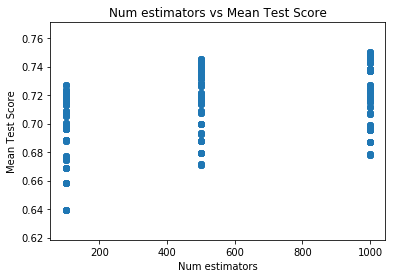

In [53]:
# how does the test score evolve with the number of trees in the ensemble
from matplotlib import pyplot as plt
plt.scatter(results['param_n_estimators'], results['mean_test_score'])
plt.title("Num estimators vs Mean Test Score")
plt.xlabel("Num estimators")
plt.ylabel("Mean Test Score")
plt.show()

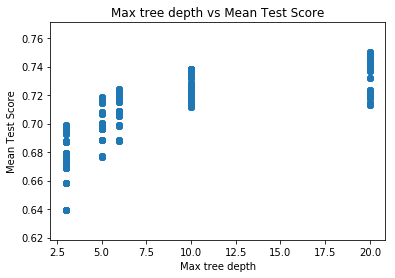

In [54]:
# how does the test score evolve with the max tree depth in the ensemble
plt.scatter(results['param_max_depth'], results['mean_test_score'])
plt.title("Max tree depth vs Mean Test Score")
plt.xlabel("Max tree depth")
plt.ylabel("Mean Test Score")
plt.show()

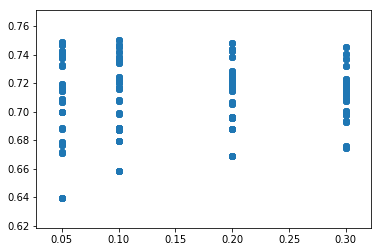

In [31]:
plt.scatter(results['param_learning_rate'], results['mean_test_score'])